In [1]:
import pandas as pd
import numpy as np
from collections import Counter
# https://www.kaggle.com/rtatman/import-functions-from-kaggle-script
from shutil import copyfile
copyfile(src = "../input/testing-spines/test_f.py", dst = "../working/test_f.py")
from test_f import spines

# Intro
In our previous post we've learned how to perform web scraping using BeautifoulSoup. We've gathered the data from Dataquests forum pages and organized it in a pandas dataframe:
* we've extracted the title, link to the post, number of replies and number of views of each post
* we've also scrapped the posts website - specifically we've targeted the first reply to the post

This is where we'll continue our work. In this post we'll clean and analyse the text data, we've obtained previously. We'll start small: cleaning and organising the title data, then we'll move on to data analysis for each title. After that little warm up session we'll move on to deeper waters: processing the actual feedback posts

In [2]:
df=pd.read_csv('../input/dq-scraping/dq.csv')
# df=pd.read_csv('../input/dq-feedback/dq.csv')
df.head()

,content,title,link,replies,views,feedback
0,"<tr class=""topic-list-item category-share-guid...",Predicting house prices,https://community.dataquest.io/t/predicting-ho...,1,26,\nprocessing data inside a function saves memo...
1,"<tr class=""topic-list-item category-share-guid...",[Re-upload]Project Feedback - Popular Data Sci...,https://community.dataquest.io/t/re-upload-pro...,3,47,"\nHi,\nI’ve been going through your project an..."
2,"<tr class=""topic-list-item category-share-guid...",GP: Clean and Analyze Employee Exit Surveys ++,https://community.dataquest.io/t/gp-clean-and-...,2,53,"\n\n\nnoticed that you’re deleting objects, af..."
3,"<tr class=""topic-list-item category-share-guid...",Project Feedback - Popular Data Science Questions,https://community.dataquest.io/t/project-feedb...,5,71,\nthink you forgot to attach your file…\n
4,"<tr class=""topic-list-item category-share-guid...",Guided Project: Answer to Albums vs. Singles w...,https://community.dataquest.io/t/guided-projec...,5,370,\n@gdelaserre: recategorized your topic. The E...


# Part 1: The title problem: everybody wants a different title
We're all guilty: we want to publish our project and gain attention. What's the easiest way to get at least some amount of attention? Think of an interesting and original title, great! So now when someone actually wants to group all the posts by their titles... 

In [3]:
# Simple reminder:
'ebay' == 'Ebay'

False

In [4]:
df['title'] = df['title'].str.lower()
df['title'].value_counts()

predicting house prices                                                          1
guided project 3:analysing car sales from ebay                                   1
sql cia_fact_book project review                                                 1
community champions of this week - dilara and mahouessimi                        1
guided project_answering business questions using sql                            1
                                                                                ..
my fifth guided project! visualizing the gender gap in college degrees           1
guided project: visualizing the gender gap in college degrees - need feedback    1
guided project: visualizing earnings based on college majors - need feedback     1
answering business questions using sql - asking for community review/comments    1
gp:exploringebaycarsalesdata with additional questions                           1
Name: title, Length: 1102, dtype: int64

1102 different titles... fortunately buried within the html code we've scrapped there's a unique lesson number

In [5]:
import string

# remove punctuations:
def remove_punctuations(text):
    for char in string.punctuation:
        text = text.replace(char, '')
    return text
df['title'] = df['title'].apply(remove_punctuations)

df['title'].value_counts()

guided project visualizing the gender gap in college degrees                                 5
guided project  exploring ebay car sales data                                                3
guided project clean and analyze employee exit surveys                                       3
guided project popular data science questions                                                2
feedback guided project profitable app profiles for the app store and google play markets    2
                                                                                            ..
guided project visualizing the gender gap in college degrees  need feedback                  1
guided project visualizing earnings based on college majors  need feedback                   1
answering business questions using sql  asking for community reviewcomments                  1
my second guided project explore hacker news posts                                           1
gpexploringebaycarsalesdata with additional questi

In [6]:
# import list of stopwords:
from nltk.corpus import stopwords

stop = stopwords.words('english')

# remove stopwords from the below example:
example1 = 'guided project visualizing the gender gap in college degrees'
' '.join([word for word in example1.split() if word not in stop])

'guided project visualizing gender gap college degrees'

In [7]:
# remove punctuations:
def remove_punctuations(text):
    for char in string.punctuation:
        text = text.replace(char, '')
    return text
df['title'] = df['title'].apply(remove_punctuations)

# remove stopwords and a few extra words from guided_list:
stop = stopwords.words('english')
guided_list = ['guided', 'project', 'feedback']
stop_extended = stop + guided_list

df['title_nostop'] = df['title'].apply(lambda x: ' '.join([word for word in x.split() if word not in stop_extended]))
# df['title_nostop'] = df['title_nostop'].apply(lambda x: ' '.join([word for word in x.split() if word not in guided_list]))

len(df['title_nostop'].unique())

927

In [8]:
df['content'][1]

'<tr class="topic-list-item category-share-guided-project tag-python tag-pandas tag-469 tag-data-analysis-business tag-469-11 has-excerpt ember-view" data-topic-id="558226" id="ember77">\n<td class="main-link clearfix" colspan="">\n<div class="topic-details">\n<div class="topic-title">\n<span class="link-top-line">\n<a class="title raw-link raw-topic-link" data-topic-id="558226" href="https://community.dataquest.io/t/re-upload-project-feedback-popular-data-science-questions/558226/2" level="2" role="heading"><span dir="ltr">[Re-upload]Project Feedback - Popular Data Science Questions</span></a>\n<span class="topic-post-badges"></span>\n</span>\n</div>\n<div class="discourse-tags"><a class="discourse-tag bullet" data-tag-name="python" href="https://community.dataquest.io/tag/python">python</a> <a class="discourse-tag bullet" data-tag-name="pandas" href="https://community.dataquest.io/tag/pandas">pandas</a> <a class="discourse-tag bullet" data-tag-name="469" href="https://community.dataq

In [9]:
df['tag'] = df['content'].str.extract('data-tag-name="(\d+)" href')
df['tag'].value_counts()

294    104
356     95
350     78
257     58
146     52
348     47
149     40
201     37
217     29
191     23
524     18
469     15
155     15
310     13
288     11
529      7
65       5
213      5
240      5
210      5
382      4
544      3
244      3
505      3
433      3
404      3
498      2
277      2
280      2
283      1
459      1
501      1
267      1
251      1
428      1
475      1
409      1
188      1
177      1
410      1
569      1
443      1
Name: tag, dtype: int64

In [10]:
df['tag'].value_counts().sum()

700

In [11]:
from collections import Counter
for a_tag in df['tag'].value_counts()[:25].index:
    top_word = Counter(" ".join(df[df['tag']==a_tag]['title_nostop']).split()).most_common(1)[0][0]
    print(a_tag,top_word)

294 ebay
356 hacker
350 app
257 cia
146 college
348 exit
149 gender
201 wars
217 nyc
191 sql
524 traffic
469 data
155 car
310 best
288 fandango
529 exchange
65 stock
213 predicting
240 predicting
210 jeopardy
382 lottery
544 sql
244 building
505 covid19
433 spam


In [12]:

more_stop = ['predicting','best','analyzing','data','exploring']
df['title_nostop'] = df['title_nostop'].apply(lambda x: ' '.join([word for word in x.split() if word not in (more_stop)]))

for a_tag in df['tag'].value_counts()[:25].index:
    top_word = Counter(" ".join(df[df['tag']==a_tag]['title_nostop']).split()).most_common(1)[0][0]
    print(a_tag,top_word)

294 ebay
356 hacker
350 app
257 cia
146 college
348 exit
149 gender
201 wars
217 nyc
191 sql
524 traffic
469 science
155 car
310 markets
288 fandango
529 exchange
65 stock
213 bike
240 house
210 jeopardy
382 lottery
544 sql
244 building
505 covid19
433 spam


In [13]:

Counter(" ".join(df[df['tag']=='155']['title_nostop']).split()).most_common(5)

[('car', 14),
 ('prices', 14),
 ('knn', 3),
 ('projectpredicting', 2),
 ('model', 1)]

In [14]:
top_word = Counter(" ".join(df[df['tag']=='294']['title_nostop']).split()).most_common(5)[0][0]
top_word

'ebay'

In [15]:
df[(df['title_nostop'].str.contains(top_word)) & df['tag'].isnull()].head()

,content,title,link,replies,views,feedback,title_nostop,tag
28,"<tr class=""topic-list-item category-share-guid...",gp exploring ebay car sales data with pandas,https://community.dataquest.io/t/gp-exploring-...,4,109,\nHello @daryaholodova! Thanks for sharing you...,gp ebay car sales pandas,NaN
38,"<tr class=""topic-list-item category-share-guid...",exploring ebay car sales data any feedback ad...,https://community.dataquest.io/t/exploring-eba...,3,267,\nHello @adam.kubalica! Thanks for sharing you...,ebay car sales advice welcome,NaN
65,"<tr class=""topic-list-item category-share-guid...",exploring ebay car sales lekane styve,https://community.dataquest.io/t/exploring-eba...,1,71,\nHi @lekanestyve! Thanks for sharing your pro...,ebay car sales lekane styve,NaN
82,"<tr class=""topic-list-item category-share-guid...",3rd project exploringebaycarsales datapyipynb,https://community.dataquest.io/t/3rd-project-e...,2,80,\nHi @rudythealchemist\nThanks for sharing you...,3rd exploringebaycarsales datapyipynb,NaN
93,"<tr class=""topic-list-item category-share-guid...",feedback requested guided project exploring eb...,https://community.dataquest.io/t/feedback-requ...,3,75,\nHi @rizvey.ma! Thanks for sharing your proje...,requested ebay car sales,NaN


In [16]:
for a_tag in df['tag'].value_counts()[:25].index:
    top_word = Counter(" ".join(df[df['tag']==a_tag]['title_nostop']).split()).most_common(1)[0][0]
    df.loc[(df['title_nostop'].str.contains(top_word)) & df['tag'].isnull(), 'tag'] = a_tag
    
df[df['tag'].isnull()].shape

(59, 8)

In [17]:
# the word 'car' issue:
df.loc[(df['title_nostop'].str.contains('german')) & (df['tag']=='155'),'tag'] = '294'

Solved

In [18]:
Counter(" ".join(df[df['tag'].isnull()]['title_nostop']).split()).most_common(10)

[('community', 16),
 ('champions', 15),
 ('week', 15),
 ('review', 6),
 ('first', 6),
 ('sharing', 4),
 ('analysis', 3),
 ('2', 3),
 ('projects', 3),
 ('requesting', 3)]

In [19]:
df = df[~(df['tag'].isnull())].copy()
df = df.drop(columns='title')

df['tag'].value_counts()[:29]

356    163
294    155
350    138
146     87
257     81
348     68
201     48
149     43
217     42
191     38
524     21
155     21
469     19
288     18
310     16
240     10
213     10
210      9
65       7
529      7
244      6
433      4
382      4
544      3
404      3
505      3
498      2
277      2
280      2
Name: tag, dtype: int64

In [20]:
# create empty dictionary and a column filled with '0's
pop_tags = {}
df['short_title'] = None

# loop trough first 29 tags and extract 2 most common words, merge them into 1 string and 
# store it in a dictionary:
for a_tag in df['tag'].value_counts()[:29].index:
    top_word = Counter(" ".join(df[df['tag']==a_tag]['title_nostop']).split()).most_common(2)[0][0]
    top_word2 = Counter(" ".join(df[df['tag']==a_tag]['title_nostop']).split()).most_common(2)[1][0]
    pop_tags[a_tag] = top_word+' '+top_word2

    
for a_tag in df['tag'].value_counts()[:29].index:
    df.loc[df['tag']==a_tag, 'short_title'] = pop_tags[a_tag]   

# Part 2: Basic EDA

In [21]:
df['short_title'].value_counts()[:10]

news hacker            163
ebay car               155
app profitable         138
college visualizing     87
cia factbook            81
exit employee           68
wars star               48
gender gap              43
nyc high                42
sql using               38
Name: short_title, dtype: int64

In [22]:
df.groupby('short_title')['views'].count()[1:]

short_title
bike rentals              10
book performance           2
building classifier        6
business solution          2
car prices                21
cia factbook              81
college visualizing       87
covid19 investigating      3
ebay car                 155
exchange rates             7
exit employee             68
fandango ratings          18
forest fire                2
gender gap                43
hacker news                3
house prices              10
jeopardy winning           9
lottery addiction          4
markets advertise         16
news hacker              163
nyc high                  42
science popular           19
spam filter                4
sql cia                    3
sql using                 38
stock market               7
traffic heavy             21
wars star                 48
Name: views, dtype: int64

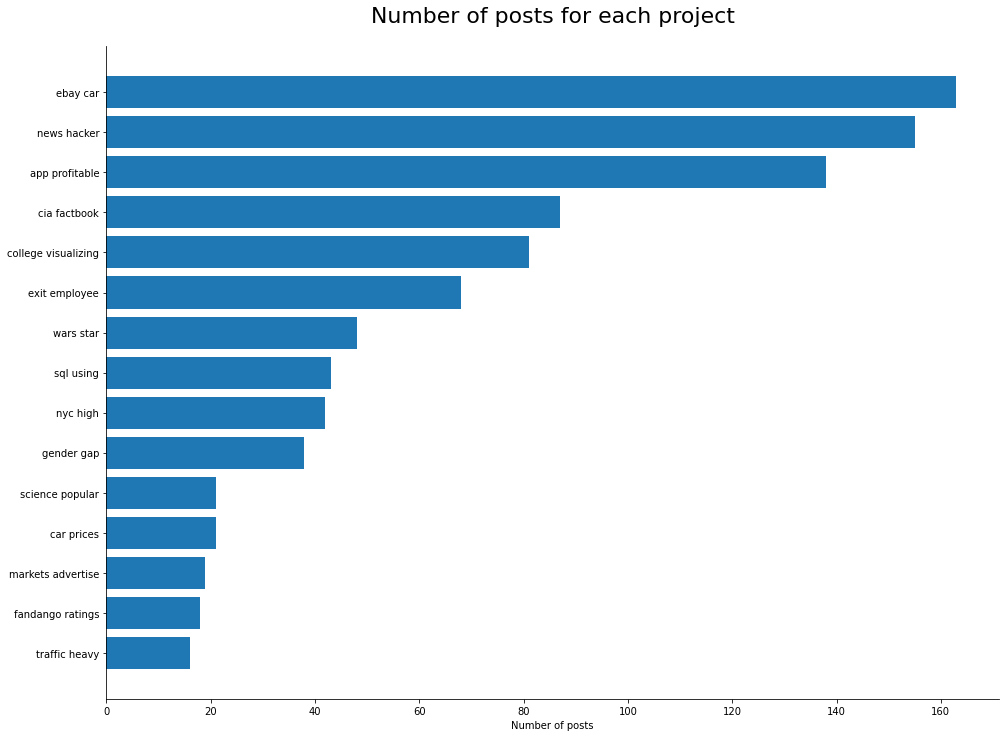

In [23]:
plot_index = df.groupby('short_title')['views'].sum().sort_values()[-15:].index
plot_values = df.groupby('short_title')['views'].sum().sort_values()[-15:].values
plot_counts = df.groupby('short_title')['views'].count().sort_values()[-15:].values

import matplotlib.pyplot as plt

# group the dataset by project title:
plot_index = df.groupby('short_title')['views'].sum().sort_values()[-15:].index
plot_counts = df.groupby('short_title')['views'].count().sort_values()[-15:].values

# create a plot:
fig, ax = plt.subplots(figsize=(16,12))
plt.barh(plot_index,plot_counts, label='number of posts')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_xlabel('Number of posts')
plt.title('Number of posts for each project',fontsize=22,pad=24)
plt.show()

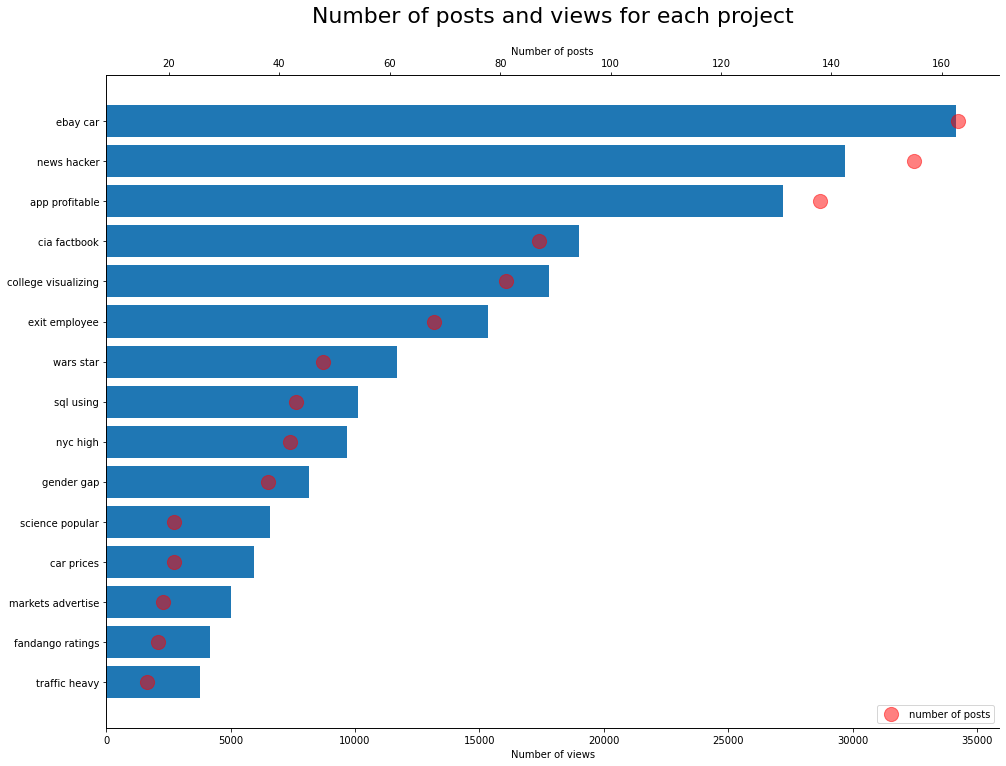

In [24]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(16,12))
plt.barh(plot_index,plot_values)
ax.spines['right'].set_visible(False)
ax.set_xlabel('Number of views')
ax=ax.twiny()
plt.scatter(plot_counts,plot_index, color='r', s=200, alpha=0.5, label='number of posts')
ax.spines['right'].set_visible(False)
ax.set_xlabel('Number of posts')
plt.legend(loc=4)
plt.title('Number of posts and views for each project',fontsize=22,pad=24)
plt.show()

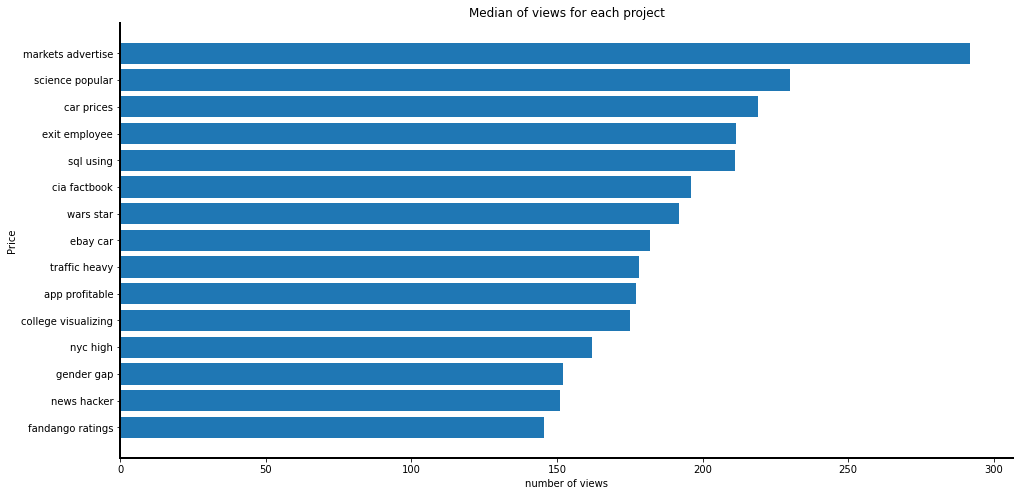

In [25]:
df_top20 = df[df['short_title'].isin(plot_index)]

plot_index = df_top20.groupby('short_title')['views'].median().sort_values()[-15:].index
plot_values = df_top20.groupby('short_title')['views'].median().sort_values()[-15:].values
fig, ax = plt.subplots(figsize=(16,8))
plt.barh(plot_index,plot_values)
spines(ax, xl='number of views', title='Median of views for each project')
plt.show()

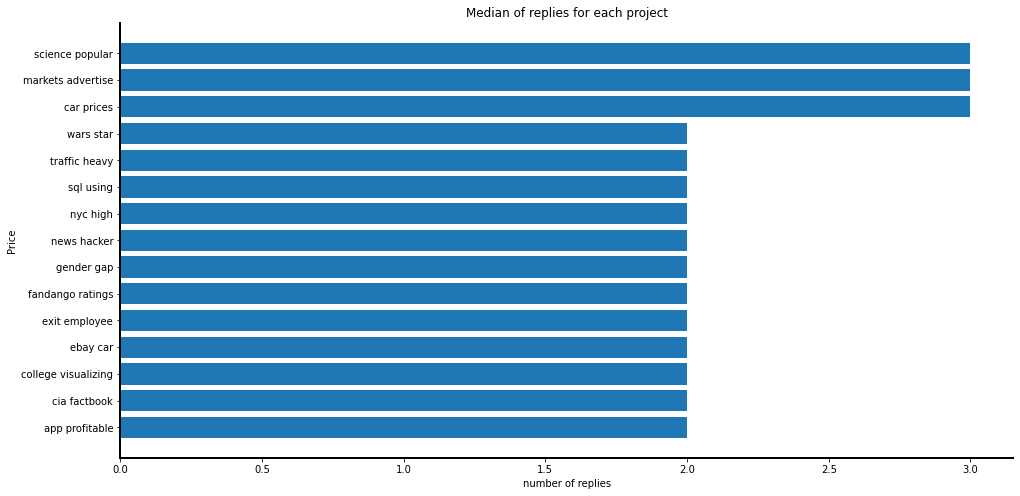

In [26]:
plot_index = df_top20.groupby('short_title')['replies'].median().sort_values()[-15:].index
plot_values = df_top20.groupby('short_title')['replies'].median().sort_values()[-15:].values
fig, ax = plt.subplots(figsize=(16,8))
plt.barh(plot_index,plot_values)
spines(ax, xl='number of replies', title='Median of replies for each project')
plt.show()

# Part 3: NLP Analysis 
### Feedback cleaning

In [27]:
!pip install contractions
import contractions

     |████████████████████████████████| 284 kB 883 kB/s            
     |████████████████████████████████| 321 kB 12.4 MB/s            
  Preparing metadata (setup.py) ... - \ done
  Created wheel for pyahocorasick: filename=pyahocorasick-1.4.2-cp37-cp37m-linux_x86_64.whl size=106882 sha256=9f92495352fef78bc5ad1ab6d1f42bd5d0797aeb14e940bce59b43d43fc29659
  Stored in directory: /root/.cache/pip/wheels/25/19/a6/8f363d9939162782bb8439d886469756271abc01f76fbd790f
Successfully built pyahocorasick


### Text cleaning

In [28]:
# remove '\n' and punctuation, lowercase all letters, expand contractions:
df['feedback'] = df['feedback'].str.replace('\n',' ').str.lower()
df['feedback'] = df['feedback'].apply(lambda x: contractions.fix(x))

# remove punctuations and stopwords, store results in a new column:
df['feedback_clean'] = df['feedback'].apply(remove_punctuations)
df['feedback_clean'] = df['feedback_clean'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

# check 10 most common words and remove them, store results in a new column:
freq10 = pd.Series(' '.join(df['feedback_clean']).split()).value_counts()[:10]
df['feedback_clean2'] = df['feedback_clean'].apply(lambda x: ' '.join([word for word in x.split() if word not in (freq10)]))

# Popular words

In [29]:
def popular_words(series):
    df['temp_list'] = series.apply(lambda x:str(x).split())
    top = Counter([item for sublist in df['temp_list'] for item in sublist])
    temp = pd.DataFrame(top.most_common(10))
    temp.columns = ['Common_words','count']
    return temp

popular_words(df['feedback_clean'])

,Common_words,count
0,project,2239
1,code,1140
2,good,721
3,like,551
4,would,544
5,sharing,525
6,hi,522
7,also,521
8,well,494
9,work,435


In [30]:
popular_words(df['feedback_clean2'])

,Common_words,count
0,data,434
1,thanks,421
2,great,394
3,use,389
4,better,385
5,cell,368
6,happy,361
7,community,353
8,comments,347
9,conclusion,343


# Tokenize

In [31]:
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
word_tokenize('The most common method is word tokenizing.')

['The', 'most', 'common', 'method', 'is', 'word', 'tokenizing', '.']

In [32]:
sent_tokenize("You can also come across sentence tokenizing. This is a simple example.")

['You can also come across sentence tokenizing.', 'This is a simple example.']

In [33]:
fc2_tokenized = word_tokenize(df['feedback_clean2'].sum())

# N-grams

In [34]:
from nltk.util import ngrams 
import collections

bigrams = ngrams(fc2_tokenized, 2)
bigrams_freq = collections.Counter(bigrams)
bigrams_freq.most_common(10)

[(('great', 'job'), 93),
 (('welcome', 'community'), 77),
 (('’', 's'), 74),
 (('everything', 'looks'), 61),
 (('guided', 'community'), 61),
 (('markdown', 'cell'), 59),
 (('ipynb', 'file'), 59),
 (('markdown', 'cells'), 56),
 (('share', 'guided'), 55),
 (('otherwise', 'everything'), 54)]

In [35]:
trigrams = ngrams(fc2_tokenized, 3)
trigrams_freq = collections.Counter(trigrams)
trigrams_freq.most_common(10)

[(('otherwise', 'everything', 'looks'), 44),
 (('upload', 'ipynb', 'file'), 29),
 (('upcoming', 'projects', 'happy'), 28),
 (('best', 'upcoming', 'projects'), 27),
 (('cells', 'order', 'starting'), 27),
 (('order', 'starting', '1'), 27),
 (('project', '’', 's'), 25),
 (('guided', 'community', 'helpful'), 25),
 (('community', 'helpful', 'difficulty'), 25),
 (('helpful', 'difficulty', 'get'), 25)]

In [36]:
f4grams = ngrams(fc2_tokenized, 4)
f4grams_freq = collections.Counter(f4grams)
df_4grams = pd.DataFrame(f4grams_freq.most_common())
df_4grams.head()

,0,1
0,"(cells, order, starting, 1)",27
1,"(best, upcoming, projects, happy)",26
2,"(guided, community, helpful, difficulty)",25
3,"(community, helpful, difficulty, get)",25
4,"(helpful, difficulty, get, help)",25


In [37]:
# lists of words to exclude and include:
exclude = ['best','help', 'happy', 'congratulation', 'learning', 'community', 'feedback', 'project', 'guided','guide', 'job', 'great', 'example', 
           'sharing', 'suggestion', 'share', 'download', 'topic', 'everything', 'nice', 'well', 'done', 'look', 'file', 'might']

include = ['use', 'consider', 'should', 'make', 'get', 'give', 'should', 'better', "would", 'code', 'markdown','cell']

# change the name of the columns:
df_4grams.columns = ['n_gram','count']

# filter out the n-grams:
df_4grams = df_4grams[(~df_4grams['n_gram'].str[0].isin(exclude))&(~df_4grams['n_gram'].str[1].isin(exclude))&(~df_4grams['n_gram'].str[2].isin(exclude))&(~df_4grams['n_gram'].str[3].isin(exclude))]
df_4grams = df_4grams[df_4grams['n_gram'].str[0].isin(include)]
df_4grams[:10]

,n_gram,count
42,"(consider, rerunning, sequential, ordering)",12
80,"(make, proper, documentation, beginning)",9
89,"(use, technical, word, documentation)",9
125,"(use, uniform, style, quote)",7
129,"(make, projects, professional, social)",7
225,"(use, “, we, ”)",5
248,"(make, always, consider, rerunning)",4
278,"(use, type, successful, data)",4
290,"(better, use, uniform, quote)",4
291,"(use, uniform, quote, mark)",4


# POS tagging

In [38]:
from nltk import pos_tag

# 1. our sentence:
sentence = 'The most common method is word tokenizing.'

# 2. tokenize the paragraph:
sentence_tokenized = word_tokenize(sentence)

# 3.use POS tagging:
sentence_tagged = pos_tag(sentence_tokenized)

print(sentence_tagged)

[('The', 'DT'), ('most', 'RBS'), ('common', 'JJ'), ('method', 'NN'), ('is', 'VBZ'), ('word', 'NN'), ('tokenizing', 'NN'), ('.', '.')]


In [39]:
from nltk import RegexpParser

# https://medium.com/@gianpaul.r/tokenization-and-parts-of-speech-pos-tagging-in-pythons-nltk-library-2d30f70af13b

# function for preparing the text - tokenizing and POS tagging:
def prep_text(text):
    # tokenize sentences:
    sent_tokenized = sent_tokenize(text)
    # tokenize words:
    word_tokens = []
    for sent in sent_tokenized:
        word_tokens.append(word_tokenize(sent))
    # POS tagging:
    pos_tagged = []
    for sent in word_tokens:
        pos_tagged.append(pos_tag(sent))
    return pos_tagged
    
# function that parses chunks out of chunked sentence and finds sentences with grammar structure we've provided
def parser(regex_pattern, pos_tagged):
    np_chunk_grammar = regex_pattern
    np_chunk_parser = RegexpParser(np_chunk_grammar)
    np_chunked_text = []
    for pos_tagged_sentence in pos_tagged:
        np_chunked_text.append(np_chunk_parser.parse(pos_tagged_sentence))
    return np_chunked_text

# count how many occurances of our target POS combination:
def chunk_counter(chunked_sentences):
    chunks = []
    # loop through each chunked sentence to extract phrase chunks of our desired sequence:
    for chunked_sentence in chunked_sentences:
        for subtree in chunked_sentence.subtrees(filter=lambda t: t.label() == 'bingo'):
            chunks.append(tuple(subtree))
    # create a Counter object and loop through the list of chunks
    chunk_counter = Counter()
    for chunk in chunks:
        chunk_counter[chunk] += 1
    # return 10 most frequent chunks
    return chunk_counter.most_common(10)

all_feedback = df['feedback'].sum()
all_feedback_tagged = prep_text(all_feedback)
chunked_text = parser("bingo: {<VB|NN|NNP><JJR><NN|NNS>}",all_feedback_tagged)
chunk_counter(chunked_text)

[((('add', 'VB'), ('more', 'JJR'), ('information', 'NN')), 3),
 ((('add', 'VB'), ('more', 'JJR'), ('weight', 'NN')), 3),
 ((('see', 'VB'), ('more', 'JJR'), ('projects', 'NNS')), 2),
 ((('add', 'VB'), ('more', 'JJR'), ('explanations', 'NNS')), 2),
 ((('add', 'VB'), ('more', 'JJR'), ('comments', 'NNS')), 2),
 ((('add', 'VB'), ('more', 'JJR'), ('info', 'NNS')), 2),
 ((('add', 'VB'), ('more', 'JJR'), ('readability', 'NN')), 2),
 ((('find', 'VB'), ('more', 'JJR'), ('tips', 'NNS')), 1),
 ((('add', 'VB'), ('more', 'JJR'), ('detail', 'NN')), 1),
 ((('attract', 'NN'), ('more', 'JJR'), ('users', 'NNS')), 1)]

In [40]:
chunked_text = parser("bingo: {<VB><DT><NN|NNS>}",all_feedback_tagged)
chunk_counter(chunked_text)

[((('have', 'VB'), ('a', 'DT'), ('look', 'NN')), 19),
 ((('take', 'VB'), ('a', 'DT'), ('look', 'NN')), 14),
 ((('improve', 'VB'), ('the', 'DT'), ('readability', 'NN')), 13),
 ((('view', 'VB'), ('the', 'DT'), ('jupyter', 'NN')), 12),
 ((('re-run', 'VB'), ('the', 'DT'), ('project', 'NN')), 12),
 ((('add', 'VB'), ('a', 'DT'), ('title', 'NN')), 11),
 ((('create', 'VB'), ('a', 'DT'), ('function', 'NN')), 11),
 ((('add', 'VB'), ('a', 'DT'), ('conclusion', 'NN')), 11),
 ((('follow', 'VB'), ('the', 'DT'), ('guideline', 'NN')), 9),
 ((('add', 'VB'), ('some', 'DT'), ('information', 'NN')), 9)]

In [41]:
chunked_text = parser("bingo: {<JJR><NN|NNS>}",all_feedback_tagged)
chunk_counter(chunked_text)

[((('better', 'JJR'), ('readability', 'NN')), 15),
 ((('more', 'JJR'), ('information', 'NN')), 12),
 ((('more', 'JJR'), ('comments', 'NNS')), 11),
 ((('better', 'JJR'), ('understanding', 'NN')), 10),
 ((('more', 'JJR'), ('projects', 'NNS')), 7),
 ((('more', 'JJR'), ('explanations', 'NNS')), 6),
 ((('more', 'JJR'), ('clarification', 'NN')), 5),
 ((('more', 'JJR'), ('details', 'NNS')), 5),
 ((('more', 'JJR'), ('detail', 'NN')), 4),
 ((('more', 'JJR'), ('users', 'NNS')), 4)]

In [42]:
chunked_text = parser("bingo: {<VB|NN><RB|VBG>?<JJ><NN|NNS><NN|NNS>?}",all_feedback_tagged)
chunk_counter(chunked_text)

[((('make', 'VB'), ('proper', 'JJ'), ('documentation', 'NN')), 9),
 ((('have', 'VB'), ('sequential', 'JJ'), ('ordering', 'NN')), 6),
 ((('combine', 'VB'), ('adjacent', 'JJ'), ('code', 'NN'), ('cells', 'NNS')),
  4),
 ((('vs', 'NN'), ('shallow', 'JJ'), ('copy', 'NN'), ('vs', 'NN')), 4),
 ((('avoid', 'VB'),
   ('too', 'RB'),
   ('obvious', 'JJ'),
   ('code', 'NN'),
   ('comments', 'NNS')),
  3),
 ((('combine', 'VB'), ('subsequent', 'JJ'), ('code', 'NN'), ('cells', 'NNS')),
  3),
 ((('rotate', 'VB'), ('x-tick', 'JJ'), ('labels', 'NNS')), 3),
 ((('remove', 'VB'), ('unnecessary', 'JJ'), ('spines', 'NNS')), 3),
 ((('remove', 'VB'), ('empty', 'JJ'), ('lines', 'NNS')), 2),
 ((('show', 'NN'), ('original', 'JJ'), ('hi', 'NN')), 2)]

### Lemmatization

In [43]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

# function for lemmatizing:
def lemmatize_it(sent):
    empty = []
    for word, tag in pos_tag(word_tokenize(sent)):
        wntag = tag[0].lower()
        wntag = wntag if wntag in ['a', 'r', 'n', 'v'] else None
        if not wntag:
            lemma = word
            empty.append(lemma)
        else:
            lemma = lemmatizer.lemmatize(word, wntag)
            empty.append(lemma)
    return ' '.join(empty)

In [44]:
# example:
string1 = 'Adam wrote this great article, spending many hours on his computer. He is truly amazing'
lemmatize_it(string1)

'Adam write this great article , spend many hour on his computer . He be truly amazing'

In [45]:
# lemmatize, then POS:
lemmatized = lemmatize_it(df['feedback'].sum())
feedback_lemmed_tagged = prep_text(lemmatized)
chunked_text = parser("bingo: {<VB|NN|NNP><JJR><NN|NNS>}", feedback_lemmed_tagged)    
chunk_counter(chunked_text)

[((('see', 'VB'), ('more', 'JJR'), ('project', 'NN')), 4),
 ((('add', 'VB'), ('more', 'JJR'), ('explanation', 'NN')), 4),
 ((('add', 'VB'), ('more', 'JJR'), ('information', 'NN')), 3),
 ((('add', 'VB'), ('more', 'JJR'), ('weight', 'NN')), 3),
 ((('make', 'VB'), ('more', 'JJR'), ('money', 'NN')), 3),
 ((('be', 'VB'), ('more', 'JJR'), ('batter', 'NN')), 2),
 ((('make', 'VB'), ('more', 'JJR'), ('sense', 'NN')), 2),
 ((('add', 'VB'), ('more', 'JJR'), ('info', 'NNS')), 2),
 ((('add', 'VB'), ('more', 'JJR'), ('readability', 'NN')), 2),
 ((('use', 'NN'), ('more', 'JJR'), ('color', 'NN')), 1)]

In [46]:
chunked_text = parser("bingo: {<JJR><NN|NNS>}",feedback_lemmed_tagged)
chunk_counter(chunked_text)

[((('better', 'JJR'), ('readability', 'NN')), 15),
 ((('more', 'JJR'), ('information', 'NN')), 12),
 ((('better', 'JJR'), ('understanding', 'NN')), 10),
 ((('more', 'JJR'), ('explanation', 'NN')), 10),
 ((('more', 'JJR'), ('detail', 'NN')), 9),
 ((('more', 'JJR'), ('project', 'NN')), 8),
 ((('more', 'JJR'), ('clarification', 'NN')), 6),
 ((('better', 'JJR'), ('approach', 'NN')), 3),
 ((('more', 'JJR'), ('comment', 'NN')), 3),
 ((('more', 'JJR'), ('line', 'NN')), 3)]

In [47]:
lemmatized = lemmatize_it(df['feedback'].sum())
feedback_lemmed_tagged = prep_text(lemmatized)
chunked_text = parser("bingo: {<VB|NN><RB|VBG>?<JJ><NN|NNS><NN|NNS>?}",feedback_lemmed_tagged)
chunk_counter(chunked_text)

[((('render', 'VB'), ('good', 'JJ'), ('output', 'NN')), 11),
 ((('make', 'VB'), ('proper', 'JJ'), ('documentation', 'NN')), 9),
 ((('be', 'VB'), ('not', 'RB'), ('skip', 'JJ'), ('sql', 'NN')), 7),
 ((('have', 'VB'), ('sequential', 'JJ'), ('ordering', 'NN')), 6),
 ((('combine', 'VB'), ('adjacent', 'JJ'), ('code', 'NN'), ('cell', 'NN')), 4),
 ((('v', 'NN'), ('shallow', 'JJ'), ('copy', 'NN'), ('v', 'NN')), 4),
 ((('add', 'VB'), ('empty', 'JJ'), ('line', 'NN')), 3),
 ((('combine', 'VB'), ('subsequent', 'JJ'), ('code', 'NN'), ('cell', 'NN')),
  3),
 ((('rotate', 'VB'), ('x-tick', 'JJ'), ('label', 'NN')), 3),
 ((('remove', 'VB'), ('unnecessary', 'JJ'), ('spine', 'NN')), 3)]

In [48]:
lemed = lemmatize_it(df['feedback_clean'].sum())
lemed_split = lemed.split()
top = Counter([item for item in lemed_split])
temp = pd.DataFrame(top.most_common(20))
temp.columns = ['Common_words','count']
temp.style.background_gradient(cmap='Blues')

,Common_words,count
0,project,2518
1,code,1181
2,use,747
3,good,712
4,well,697
5,cell,664
6,like,648
7,share,627
8,would,544
9,work,543


In [49]:
df['feedback_clean2_lem'] = df['feedback_clean2'].apply(lemmatize_it)

In [50]:
f4grams = ngrams(word_tokenize(df['feedback_clean2_lem'].sum()), 4)
f4grams_freq = collections.Counter(f4grams)
df_4grams = pd.DataFrame(f4grams_freq.most_common())
df_4grams.columns = ['n_gram','count']

# filter out the n-grams:
df_4grams = df_4grams[(~df_4grams['n_gram'].str[0].isin(exclude))&(~df_4grams['n_gram'].str[1].isin(exclude))&(~df_4grams['n_gram'].str[2].isin(exclude))&(~df_4grams['n_gram'].str[3].isin(exclude))]
df_4grams = df_4grams[df_4grams['n_gram'].str[0].isin(include)]
df_4grams[:10]

,n_gram,count
0,"(cell, order, start, 1)",30
41,"(consider, rerun, sequential, order)",12
67,"(use, easy, access, reader)",9
84,"(make, proper, documentation, begin)",9
93,"(use, technical, word, documentation)",9
117,"(use, comment, remember, comment)",8
126,"(give, markdown, cell, conclusion)",7
127,"(cell, without, output, markdown)",7
133,"(use, uniform, style, quote)",7
136,"(use, uniform, quote, mark)",7
